In [5]:
# install the packages if needed
!pip install yfinance
!pip install pandas
!pip install numpy
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 6.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 7.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 7.6 MB/s eta 0:00:0000:0100:01


In [1]:
import yfinance as yf
import pandas as pd

In [2]:
# load historical stock data of spy

spy = yf.Ticker("SPY")


<Axes: title={'center': 'SPY daily price difference'}, xlabel='Date', ylabel='Price difference'>

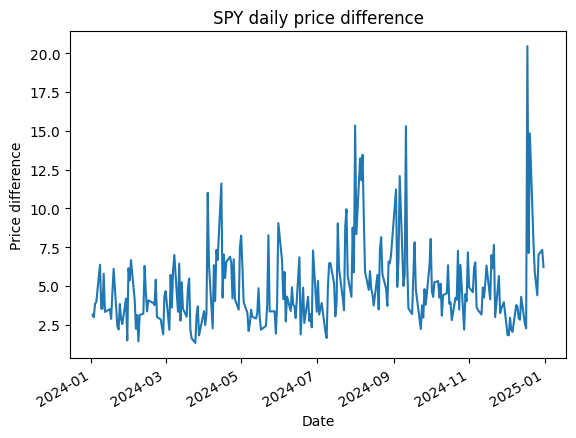

In [3]:
# compute the daily difference between the high and low prices of past year
PERIOD = "1y"
INTERVAL = "1d"

hist = spy.history(period=PERIOD, interval=INTERVAL)
hist["diff"] = hist["High"] - hist["Low"]


hist["diff"].plot(title="SPY daily price difference", ylabel="Price difference", xlabel="Date")



diff_bin
3-5     107
5-10     83
2-3      40
<2       11
>10      11
Name: count, dtype: int64


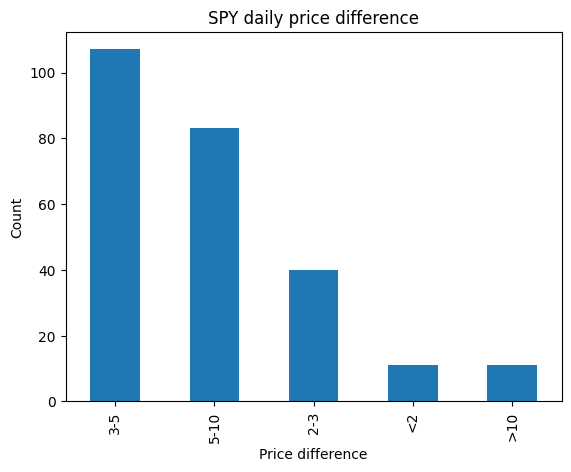

In [5]:
# plot the daily difference between the high and low prices of past year
# less than 2, 2-3, 3-5, 5-10, more than 10

bins = [0, 2, 3, 5, 10, 100]
labels = ["<2", "2-3", "3-5", "5-10", ">10"]
hist["diff_bin"] = pd.cut(hist["diff"], bins=bins, labels=labels)

hist["diff_bin"].value_counts().plot(kind="bar", title="SPY daily price difference", ylabel="Count", xlabel="Price difference")
# print the count of each bin
print(hist["diff_bin"].value_counts())


In [ ]:

# get historical market data of past 5 years with interval of 1 day
PERIOD = "5y"
INTERVAL = "1d"

spy_data = spy.history(period=PERIOD, interval=INTERVAL)

In [3]:
spy_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2019-12-30 00:00:00-05:00,299.414868,299.553931,297.189747,297.681122,49729100,0.0,0.0,0.0
2019-12-31 00:00:00-05:00,297.171173,298.654578,296.818861,298.404236,57077300,0.0,0.0,0.0
2020-01-02 00:00:00-05:00,299.961853,301.213476,299.025448,301.194916,59151200,0.0,0.0,0.0
2020-01-03 00:00:00-05:00,297.755279,300.054558,297.699654,298.914185,77709700,0.0,0.0,0.0
2020-01-06 00:00:00-05:00,297.134131,300.138034,297.013600,300.054596,55653900,0.0,0.0,0.0


Matplotlib is building the font cache; this may take a moment.


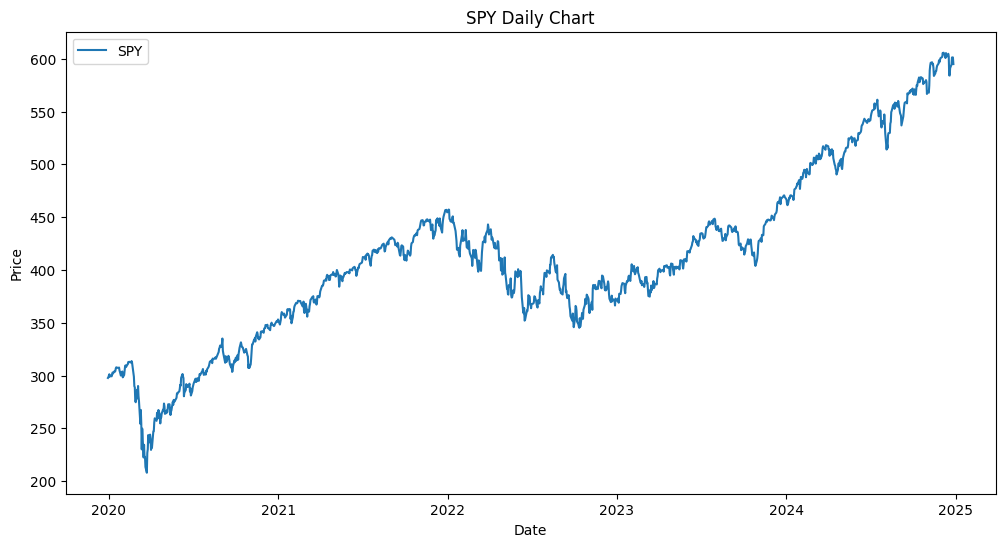

In [ ]:
# plot the daily chart of spy


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(spy_data.index, spy_data["Close"], label="SPY")
plt.title("SPY Daily Chart")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [16]:
# download the weekly data of spy with interval of 1 min
# since we can only get 7 days of data with interval of 1 min
# so we will get the data of weekly data of past 5 years with interval of 1 min each time

import datetime


def get_weekly_data(ticker, period, interval):
    data = pd.DataFrame()
    end = datetime.datetime.now()
    start = end - datetime.timedelta(days=7)
    while True:
        data = data.append(ticker.history(start=start, end=end, interval=interval))
        end = start
        start = end - datetime.timedelta(days=7)
        if end < datetime.datetime.now() - datetime.timedelta(days=30):
            print("Data collection completed")
            break


    return data


spy_weekly_data = get_weekly_data(spy, PERIOD, "1m")



AttributeError: 'DataFrame' object has no attribute 'append'

In [17]:
spy_weekly_data

[                                 Open        High         Low       Close  \
 Datetime                                                                    
 2024-12-23 09:30:00-05:00  590.890015  591.770020  590.710022  591.719971   
 2024-12-23 09:31:00-05:00  591.719971  591.770020  591.070007  591.619995   
 2024-12-23 09:32:00-05:00  591.609985  591.760010  591.349976  591.690002   
 2024-12-23 09:33:00-05:00  591.700012  591.770020  591.489990  591.619995   
 2024-12-23 09:34:00-05:00  591.609985  591.640015  591.229980  591.229980   
 ...                               ...         ...         ...         ...   
 2024-12-27 15:55:00-05:00  594.640015  594.710022  594.150024  594.445007   
 2024-12-27 15:56:00-05:00  594.450012  594.510010  594.179993  594.469971   
 2024-12-27 15:57:00-05:00  594.489990  594.844971  594.440002  594.760010   
 2024-12-27 15:58:00-05:00  594.760010  594.809998  594.510010  594.669983   
 2024-12-27 15:59:00-05:00  594.659973  595.010010  594.510010  

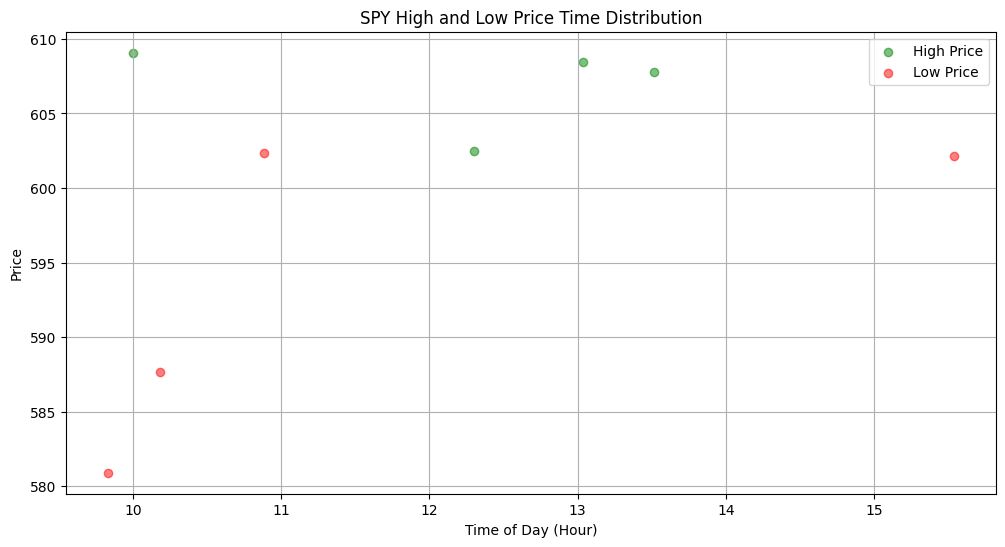

In [13]:
# compute the most common time range of the high and low price of spy occurred
# at the timeline of the past 30 days

# we need to plot the frequency of the high and low price of spy occurred
# green dot represents the high price
# red dot represents the low price

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

high_price = []
low_price = []
high_times = []
low_times = []

# Process each weekly dataset
for data in spy_weekly_data:
    if not data.empty:
        # Skip if all values are NaN
        if not data['High'].isna().all() and not data['Low'].isna().all():
            # Find the time indexes where high and low prices occur
            daily_high_idx = data['High'].idxmax()
            daily_low_idx = data['Low'].idxmin()
            
            # Store the times and prices
            high_times.append(daily_high_idx.time())
            low_times.append(daily_low_idx.time())
            high_price.append(data.loc[daily_high_idx, 'High'])
            low_price.append(data.loc[daily_low_idx, 'Low'])

# Convert to hours for better visualization
high_hours = [t.hour + t.minute/60 for t in high_times]
low_hours = [t.hour + t.minute/60 for t in low_times]

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(high_hours, high_price, color='g', alpha=0.5, label='High Price')
plt.scatter(low_hours, low_price, color='r', alpha=0.5, label='Low Price')
plt.title('SPY High and Low Price Time Distribution')
plt.xlabel('Time of Day (Hour)')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()